In [1]:
!pip install --upgrade keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [ ]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.0 MB/s eta 0:00:00


In [ ]:
import keras
print(keras.__version__)

3.5.0


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Generation = 1
Fitness    = 1.6722874737975666
Generation = 2
Fitness    = 1.6722874737975666
Generation = 3
Fitness    = 1.7006056006734749
Generation = 4
Fitness    = 1.7006056006734749
Generation = 5
Fitness    = 1.7006056006734749
Generation = 6
Fitness    = 1.7006056006734749
Generation = 7
Fitness    = 1.8204025357258635
Generation = 8
Fitness    = 1.8204025357258635
Generation = 9
Fitness    = 1.8204025357258635
Generation = 10
Fitness    = 1.8899232891523476
Generation = 11
Fitness    = 1.8899232891523476
Generation = 12
Fitness    = 1.891633542473945
Generation = 13
Fitness    = 1.8968935848978214
Generation = 14
Fitness    = 2.0599196810355167
Generation = 15
Fitness    = 2.0599196810355167
Generation = 16
Fitness    = 2.0599196810355167
Generation = 17
Fitness    = 2.0599196810355167
Generation = 18
Fitness    = 2.0599196810355167
Generation = 19
Fitness    = 2.0599196810355167
Generation = 20
Fitness    = 2.112774071271658
Generation = 21
Fitness    = 2.112774071271658
Gene

Fitness    = 7739380.763515218


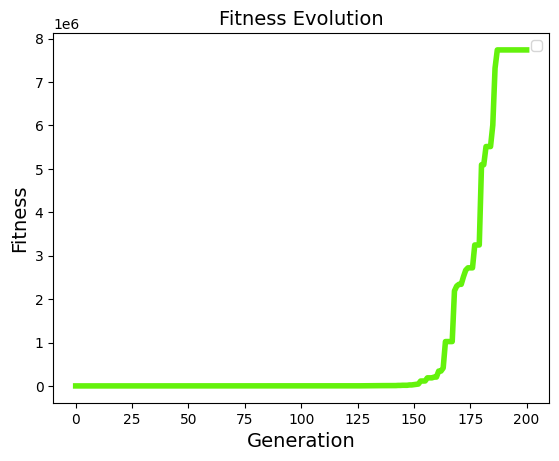

Best Fitness: 7739380.763515218
Best Solution Index: 0
Predictions:
[[9.9999988e-01 1.2497333e-07]
 [1.9762512e-08 1.0000000e+00]
 [1.4532915e-07 9.9999988e-01]
 [1.0000000e+00 8.1254820e-15]]
Crossentropy Loss: 1.192093e-07
Model Accuracy: 1.0
[array([[-2.15709037,  2.5937552 ,  4.49566023, -3.16097203],
       [ 3.72448075,  1.89706479, -4.12563866, -1.08007896]]), array([-1.58316854, -2.01878218, -0.35544364, -3.02522921]), array([[-8.74122775,  6.96626358],
       [ 0.5807435 , -6.16416395],
       [-3.15063653,  5.42803711],
       [ 2.82639085,  1.03288137]]), array([ 8.54074949, -7.35441592])]


In [ ]:
import keras
import pygad
import numpy as np
import pygad.kerasga as pk

def evaluate_solution(ga_engine, solution_vector, index):
    global inputs, targets, ga_keras, nn_model

    pred = pk.predict(model=nn_model,
                                 solution=solution_vector,
                                 data=inputs)

    loss_function = keras.losses.BinaryCrossentropy()
    fitness_score = 1.0 / (loss_function(targets, pred).numpy() + 1e-8)

    return fitness_score


def generation_callback(ga_instance):
    print(f"Generation = {ga_instance.generations_completed}")
    current_fitness = ga_instance.best_solution()[1]
    print(f"Fitness    = {current_fitness}")


# Constructing the neural network model
input_node = keras.layers.Input(shape=(2,))
hidden_layer = keras.layers.Dense(4, activation="relu")(input_node)
output_node = keras.layers.Dense(2, activation="softmax")(hidden_layer)

nn_model = keras.Model(inputs=input_node, outputs=output_node)



# Data for XOR problem
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])

targets = np.array([[1, 0],
                    [0, 1],
                    [0, 1],
                    [1, 0]])

# Configuration for PyGAD
# Setting up PyGAD with Keras
ga_keras = pk.KerasGA(model=nn_model,
                                 num_solutions=10)
generations = 200
parents_mating = 5
initial_pop_weights = ga_keras.population_weights

# Initializing PyGAD instance
ga_optimizer = pygad.GA(num_generations=generations,
                        num_parents_mating=parents_mating,
                        initial_population=initial_pop_weights,
                        fitness_func=evaluate_solution,
                        on_generation=generation_callback)

# Running the optimization
ga_optimizer.run()

# Plotting the fitness evolution
ga_optimizer.plot_fitness(title="Fitness Evolution", linewidth=4)

# Best solution details
best_solution, best_fitness, best_index = ga_optimizer.best_solution()
print(f"Best Fitness: {best_fitness}")
print(f"Best Solution Index: {best_index}")

# Making predictions using the best solution
best_predictions = pygad.kerasga.predict(model=nn_model,
                                         solution=best_solution,
                                         data=inputs)
print(f"Predictions:\n{best_predictions}")

# Evaluating the best model
crossentropy = keras.losses.BinaryCrossentropy()
print("Crossentropy Loss:", crossentropy(targets, best_predictions).numpy())

# Accuracy of the model
accuracy_metric = keras.metrics.BinaryAccuracy()
accuracy_metric.update_state(targets, best_predictions)
print(f"Model Accuracy: {accuracy_metric.result().numpy()}")

print(pk.model_weights_as_matrix(model=nn_model, weights_vector=best_solution))
